## Haris Sumra
## 12/12/2019
## FinalProject

### In this Module we are going to:
* How many building violations are issued in NYC each year? What are the most common types of violations issued? Where are the most building violations issued?
* Formatting the violations so that we can see which years there were most violations issued
* We will also anaswer which zipcodes had the most tickets issued

### Importing Libraries

In [140]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import division
from geopandas import GeoDataFrame

# Set max column display width to 55
pd.set_option("display.max_columns", 55)

In [141]:
directory = '../../NYCHousingMaintenanceCodeProject/' #set the directory for where the data can be found on your machine

In [180]:
#create pandas dataframe from the csv data file
df = pd.read_csv("../data/zip_count.csv",low_memory=False)

In [181]:
#df = pd.read_csv("https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$limit=500000")

### At this point, you want to preview the data to make sure it was read in properly.

In [182]:
df

,Unnamed: 0,zip,count,city,lat,long
0,0,11226,1898,Brooklyn,-73.955530,40.645256
1,1,10453,1736,Bronx,-73.912140,40.853017
2,2,10458,1536,Bronx,-73.888810,40.864166
3,3,10457,1504,Bronx,-73.898610,40.846745
4,4,11221,1489,Brooklyn,-73.926370,40.691234
5,5,10456,1394,Bronx,-73.908560,40.829676
6,6,10468,1390,Bronx,-73.899160,40.867107
7,7,10467,1390,Bronx,-73.869370,40.872265
8,8,11207,1338,Brooklyn,-73.894240,40.670874
9,9,11233,1303,Brooklyn,-73.918580,40.676938


In [150]:
#df[df['boro'] == 'Bronx'] #return rows with 'issued' ticket status

# How many building permits are issued in NYC each year?
### Format date to perform datetime functions

In [153]:
years = df['originalcertifybydate'] = pd.to_datetime(df['originalcertifybydate'], format='%Y-%m-%d') #format date to perform datetime functions

## Counting values by year using datetime function

In [154]:
df['originalcertifybydate'].dt.year.value_counts() 

2014.0    216581
2015.0    172411
2018.0     16556
2019.0     13616
2013.0      9034
2017.0      8897
2016.0      6161
2008.0      3273
2007.0       927
2009.0       924
2012.0       749
2006.0       669
2011.0       585
2010.0       523
2002.0       345
2003.0       314
2005.0       265
2004.0       229
2001.0       225
1997.0       178
2000.0       176
1999.0       138
1998.0       121
1991.0       106
1995.0        67
2020.0        62
1992.0        61
1993.0        57
1990.0        56
1994.0        53
1996.0        36
1989.0        25
1987.0        17
1988.0         6
1982.0         6
1976.0         5
1985.0         3
1986.0         2
1983.0         2
1975.0         2
1981.0         1
Name: originalcertifybydate, dtype: int64

### Sorting the years then calculating percent change

In [29]:
df['certifieddate'].dt.year.value_counts().sort_index().pct_change() 

1977.0           NaN
1981.0     -0.500000
1982.0      6.000000
1984.0     -0.571429
1985.0     -0.333333
1987.0      4.000000
1989.0     -0.400000
1990.0      0.000000
1991.0     -0.500000
1992.0      2.333333
1993.0     -0.900000
1994.0     15.000000
1995.0     -0.812500
1996.0      2.333333
1997.0     -0.700000
1998.0      0.333333
1999.0      0.000000
2001.0      5.500000
2002.0     -0.884615
2007.0     -0.333333
2008.0     11.500000
2009.0     -0.840000
2010.0     -0.750000
2011.0      7.000000
2012.0     -0.875000
2013.0    597.000000
2014.0      8.994983
2015.0     -0.897273
2016.0     -0.223127
2017.0     -0.207547
2018.0     -0.116402
2019.0     -0.634731
Name: certifieddate, dtype: float64

# Calculate the percent change of tickets issued over years

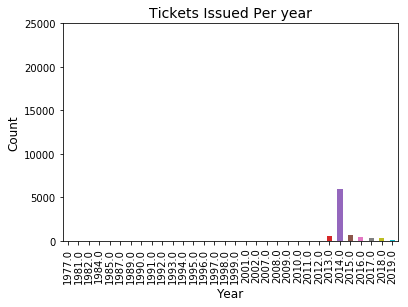

In [30]:
df['certifieddate'].dt.year.value_counts().sort_index().plot(kind='bar') #sorting index so data is in order by year

#Plotting the data
plt.title('Tickets Issued Per year', size=14)
plt.xlabel('Year', size=12)
plt.ylabel('Count', size=12)
plt.ylim(0,25000)
plt.xticks(rotation='vertical')
plt.show()

### We can observe that the tickets issued in 2014 is the highest, and in 2013 the second highest.

### Now let's compare and see if both the "boroid" and "boro" return the same numbers for furthers analysis

In [32]:
df['buildingid'].value_counts().sort_values(ascending=False)

57762     207
116935    187
7206      177
67273     141
97967     109
81719     109
119285     97
339821     88
808406     86
116998     85
21246      83
294186     81
45627      78
313702     76
221874     74
808361     71
351916     71
20679      70
141792     70
55615      69
119098     67
284638     66
341567     66
81989      65
59487      65
118885     64
111958     63
104340     63
143276     60
20765      58
         ... 
187503      1
23647       1
158995      1
517982      1
542538      1
640262      1
183687      1
23977       1
169493      1
19831       1
221832      1
809215      1
116751      1
107120      1
395877      1
173954      1
808959      1
885332      1
43601       1
158894      1
806058      1
17148       1
805629      1
339527      1
263746      1
3423        1
64865       1
28143       1
730566      1
363364      1
Name: buildingid, Length: 8714, dtype: int64

In [33]:
#df['boroid'] = df['boroid'].map({1: 'Manhattan', 2: 'Bronx',3: 'Brooklyn', 4: 'Queens',5: 'Staten Island'}) #use map function to set new values

In [34]:
#Plotting the data
#fig = plt.figure(figsize=(14,7))

#df['boroid'].value_counts().plot(kind='bar')

#plt.title('Tickets Issued by Borotype', size=14)
#plt.ylabel('Count', size=12)
#plt.xticks(rotation='horizontal')
#plt.show()

### Indeed, "boroid" and "boro" return the same acount of numbers.

In [155]:
df['boro'].value_counts() #counting the # of tickets by borough

BROOKLYN         174970
BRONX            164247
MANHATTAN        104458
QUEENS            48708
STATEN ISLAND      7617
Name: boro, dtype: int64

### We can now compare which Borough got the highest tickets

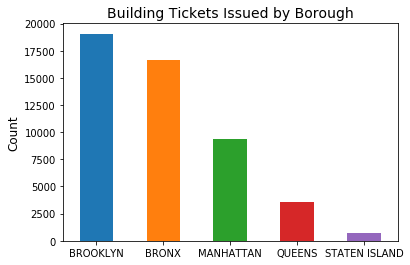

In [36]:
#Plotting the data
df['boro'].value_counts().plot(kind='bar')

plt.title('Building Tickets Issued by Borough', size=14)
plt.ylabel('Count', size=12)
plt.xticks(rotation='horizontal')
plt.show()

In [156]:
df['currentstatus'].value_counts().sort_values(ascending=False)

VIOLATION CLOSED                            275192
VIOLATION DISMISSED                         141506
NOV SENT OUT                                 45408
INFO NOV SENT OUT                            10965
NOT COMPLIED WITH                             8934
FIRST NO ACCESS TO RE- INSPECT VIOLATION      8764
NOV CERTIFIED LATE                            3581
INVALID CERTIFICATION                         2295
DEFECT LETTER ISSUED                           844
SECOND NO ACCESS TO RE-INSPECT VIOLATION       835
CERTIFICATION POSTPONMENT DENIED               321
NOTICE OF ISSUANCE SENT TO TENANT              288
FALSE CERTIFICATION                            242
VIOLATION WILL BE REINSPECTED                  235
CERTIFICATION POSTPONMENT GRANTED              216
CIV14 MAILED                                   151
NOV CERTIFIED ON TIME                           85
VIOLATION REOPEN                                63
VIOLATION OPEN                                   4
Name: currentstatus, dtype: int

## Running some statistical analysis on two of my Borough to see what values they return and if they are outliers by any chance. 

In [38]:
len(df[df['boro'] == 'MANHATTAN']) / len(df) #dividing the number of Manhattan records by the entire data set

0.18909886370541412

In [39]:
len(df[df['boro'] == 'BROOKLYN']) / len(df) #dividing the number of Brooklyn records by the entire data set

0.38605659192643454

## Boroughs seems to be within the statistical means

### What are Ticket types by residential?

In [111]:
boro = ['BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'BRONX'] #list of borough names to pass to for loop

for i in boro:
    """
    this for loop returns the percentage of residential permits
    within each borough

    count the number of residential permits then divide by the
    total number of borough permits
    """
    print ('\n' + i)
    print (df[df['boro'] == i]['residential'].value_counts() / len(df[df['boro'] == i]))

In [158]:
#df['zip'] = pd.to_numeric(df['zip']).astype(int)
df = df.fillna(0)
df.zip.astype(int)

0         11203
1         10460
2         10451
3         11203
4         11203
5         11203
6         11203
7         10460
8         10460
9         11203
10        11203
11        11203
12        10472
13        10468
14        11213
15        11208
16        11226
17        11233
18        10462
19        11237
20        11237
21        11237
22        11237
23        11237
24        11237
25        11237
26        10027
27        11691
28        11213
29        11213
          ...  
499970    10031
499971    11228
499972    10031
499973    10031
499974    10031
499975    10458
499976    11214
499977    10452
499978    11223
499979    11219
499980    10031
499981    10452
499982    10031
499983    10452
499984    10030
499985    11374
499986    10452
499987    11374
499988    11204
499989    10032
499990    11222
499991    11385
499992    11230
499993    11207
499994    10457
499995    11207
499996    11223
499997    10457
499998    11235
499999    10457
Name: zip, Length: 50000

In [216]:
zip_codes['ZIPCODE'] = pd.to_numeric(zip_codes['ZIPCODE']).astype(int)

### Now let's check to see which Zip code had the highest ticket number and run some statistical analysis on them

### How many tickets have been issued by zip code?

In [197]:
df['zip'].sort_index().head(5)  #counting the # of permits by zipcode then sorting them

0    11226
1    10453
2    10458
3    10457
4    11221
Name: zip, dtype: int64

In [196]:
#df = df[df['zip'] >= 10000] #returns only zip codes that are > or = to 10000

### Zipcode with most tickets issues

In [198]:
df['zip'].sort_values(ascending=False).head(5) #five zip codes with most tickets issued

126    11694
148    11693
118    11692
46     11691
124    11436
Name: zip, dtype: int64

In [199]:
#zip_codes = GeoDataFrame.from_file('../ZIP_C/ZIP_CODE_040114.shp') #read in shape file

In [200]:
zip_codes = GeoDataFrame.from_file("../data/ZIP_CODE_040114/ZIP_CODE_040114.shp") #read in shape file

In [201]:
zip_codes.isna().any()

ZIPCODE       False
BLDGZIP       False
PO_NAME       False
POPULATION    False
AREA          False
STATE         False
COUNTY        False
ST_FIPS       False
CTY_FIPS      False
URL           False
SHAPE_AREA    False
SHAPE_LEN     False
geometry      False
dtype: bool

In [202]:
#zip_codes = zip_codes.fillna(0)

In [203]:
zip_codes

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,..."
6,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.3515269756 173946.4621963799,..."
7,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.0097044706 171110.0666224658,..."
8,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.2959063053 171240.7064530551,..."
9,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.1699339747 170730.1687602103,..."


In [204]:
df.head(2)

,Unnamed: 0,zip,count,city,lat,long
0,0,11226,1898,Brooklyn,-73.95553,40.645256
1,1,10453,1736,Bronx,-73.91214,40.853017


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 165
Data columns (total 6 columns):
Unnamed: 0    166 non-null int64
zip           166 non-null int64
count         166 non-null int64
city          166 non-null object
lat           166 non-null float64
long          166 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.1+ KB


In [217]:
zip_codes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 13 columns):
ZIPCODE       263 non-null int64
BLDGZIP       263 non-null object
PO_NAME       263 non-null object
POPULATION    263 non-null float64
AREA          263 non-null float64
STATE         263 non-null object
COUNTY        263 non-null object
ST_FIPS       263 non-null object
CTY_FIPS      263 non-null object
URL           263 non-null object
SHAPE_AREA    263 non-null float64
SHAPE_LEN     263 non-null float64
geometry      263 non-null geometry
dtypes: float64(4), geometry(1), int64(1), object(7)
memory usage: 26.8+ KB


### In order to merge two dataframes, there must be a shared column. The shared column must have the same data type.

#### Ensure zip code column data types are the same for merging.

In [191]:
#zip_codes['zip_code'] = zip_codes['ZIPCODE'].astype(int) #converting zipcode column to integer data type
#df['zip'] = df['zip'].astype(int)

In [207]:
#counts = df['zip']
#counts = counts.to_frame(name='count')
#counts = counts.reset_index()

In [227]:
#counts = GeoDataFrame(counts.merge(zip_codes, how='left', left_on='index', right_on='zip'))
#GeoDataFrame(counts.merge(zip_codes, how=‘left’, left_on=‘index’, right_on=‘ZIPCODE’))
#counts.merge(zip_codes, how=‘inner’, left_on=‘zip’, right_on=‘zipcounts’)
counts = GeoDataFrame(df.merge(zip_codes, how='inner', left_on='zip', right_on='ZIPCODE'))

In [228]:
counts

,Unnamed: 0,zip,count,city,lat,long,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,0,11226,1898,Brooklyn,-73.95553,40.645256,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,..."
1,1,10453,1736,Bronx,-73.91214,40.853017,10453,0,Bronx,77576.0,2.574851e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1011926.555855393 251674.4530655444,..."
2,2,10458,1536,Bronx,-73.88881,40.864166,10458,0,Bronx,79362.0,3.596881e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1016105.938572735 259343.7165983766,..."
3,3,10457,1504,Bronx,-73.89861,40.846745,10457,0,Bronx,70253.0,3.764061e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1011926.555855393 251674.4530655444,..."
4,4,11221,1489,Brooklyn,-73.92637,40.691234,11221,0,Brooklyn,80232.0,3.858048e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001383.64485465 188443.122179389, 1..."
5,5,10456,1394,Bronx,-73.90856,40.829676,10456,0,Bronx,89390.0,2.993345e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1008285.147127733 245256.0794193894,..."
6,6,10468,1390,Bronx,-73.89916,40.867107,10468,0,Bronx,72877.0,3.444760e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1015493.785269484 260806.2185946256,..."
7,7,10467,1390,Bronx,-73.86937,40.872265,10467,0,Bronx,97932.0,6.933617e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1017396.305742651 265444.4701448828,..."
8,8,11207,1338,Brooklyn,-73.89424,40.670874,11207,0,Brooklyn,93556.0,7.396626e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1010961.260213807 190844.5179671347,..."
9,9,11233,1303,Brooklyn,-73.91858,40.676938,11233,0,Brooklyn,66737.0,3.787169e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001383.64485465 188443.122179389, 1..."


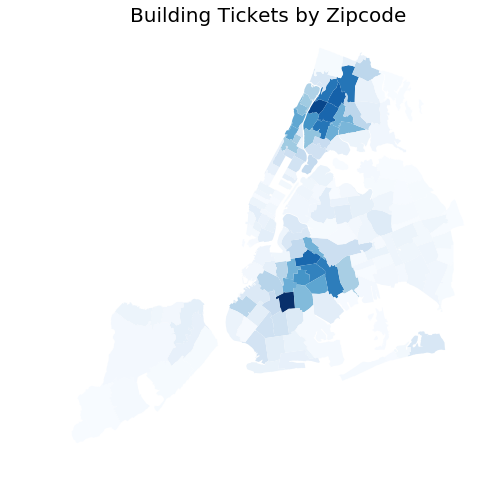

In [230]:
#Plotting the data
fig, ax = plt.subplots(figsize = (8,8))

counts.plot(column='count', cmap='Blues',alpha=1,linewidth=0.1, ax=ax)

plt.title('Building Tickets by Zipcode', size=20)
plt.axis('off')
plt.show()

# The heatmap is darker in areas with more tickets are issued, and lighter in areas with fewer tickets issued.

## We can observe that the tickets issued in 2014 is the highest, and in 2013 the second highest. Brooklyn had the highest number of tickets issued. And Zipcode 11226 had the highest number of tickets issued in Brooklyn.

In [224]:
counts

,Unnamed: 0,zip,count,city,lat,long,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,0,11226,1898,Brooklyn,-73.95553,40.645256,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,..."
1,1,10453,1736,Bronx,-73.91214,40.853017,10453,0,Bronx,77576.0,2.574851e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1011926.555855393 251674.4530655444,..."
2,2,10458,1536,Bronx,-73.88881,40.864166,10458,0,Bronx,79362.0,3.596881e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1016105.938572735 259343.7165983766,..."
3,3,10457,1504,Bronx,-73.89861,40.846745,10457,0,Bronx,70253.0,3.764061e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1011926.555855393 251674.4530655444,..."
4,4,11221,1489,Brooklyn,-73.92637,40.691234,11221,0,Brooklyn,80232.0,3.858048e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001383.64485465 188443.122179389, 1..."
5,5,10456,1394,Bronx,-73.90856,40.829676,10456,0,Bronx,89390.0,2.993345e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1008285.147127733 245256.0794193894,..."
6,6,10468,1390,Bronx,-73.89916,40.867107,10468,0,Bronx,72877.0,3.444760e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1015493.785269484 260806.2185946256,..."
7,7,10467,1390,Bronx,-73.86937,40.872265,10467,0,Bronx,97932.0,6.933617e+07,NY,Bronx,36,005,http://www.usps.com/,0.0,0.0,"POLYGON ((1017396.305742651 265444.4701448828,..."
8,8,11207,1338,Brooklyn,-73.89424,40.670874,11207,0,Brooklyn,93556.0,7.396626e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1010961.260213807 190844.5179671347,..."
9,9,11233,1303,Brooklyn,-73.91858,40.676938,11233,0,Brooklyn,66737.0,3.787169e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001383.64485465 188443.122179389, 1..."
